# <center> <img src="figs/logo_facens.png" alt="Logo Facens" width="110" align="left"/>  <br/> <center>Facens<br/>
</p>

<br/>
  
<font size="3"><center>Victor Hugo Soares Tavares, 171689</center></font>




# Aprendizado de Máquinas
### 2022PGS2M1
----

## <center> Atividade PCA </center>

    
Utilizando o dataset 'winequality-red.csv', que esta na pasta dataset do zip da aula de 06/05:

Com a nossa classe PCA, criada em sala de aula, Explicar com grafico da variancia explicada, quantos componentes são necessários para 80% de variancia. Com o resultado, número de componentes para 80% de variancia, reduzir/projetar o dataset neste numero de componentes, dividir em treino e teste e aplicar o GaussianNB e printar os resultados com o Classification Report


## Importando Libs

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, \
                            f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import datasets
import random
from sklearn.naive_bayes import GaussianNB

### Criando Classe PCA

Com a nossa classe PCA, criada em sala de aula, Explicar com grafico da variancia explicada, quantos componentes são necessários para 80% de variancia.

In [16]:
# Análise dos Componentes

def component_analysis(e, plot='none'):
    varexp = 100* e/e.sum()
    cumvarexp = np.cumsum(varexp)

    # Plotando os autovalores
    if (plot=='eigen'):
        plt.figure(figsize = (4,4))
        plt.plot(e, '-o')
        plt.grid(True)
        plt.xlabel('Componente', fontsize = 15)
        plt.ylabel('Autovalor', fontsize = 15)
        xint = []
        locs, labels = plt.xticks()
        for each in locs:
            xint.append(int(each))
        plt.xticks(xint)

    # Plotando a explicação da variancia
    if (plot=='varexp'):
        plt.figure(figsize = (4,4))
        plt.plot(cumvarexp, '-o')
        plt.xlabel('Componente', fontsize = 15)
        plt.ylabel('% da variancia explicada', fontsize = 15)
        plt.grid(True)
        xint = []
        locs, labels = plt.xticks()
        for each in locs:
            xint.append(int(each))
        plt.xticks(xint)

    plt.show()

In [3]:
#Initializing the PCA Class
class PCA_C():

    #Class responsible for the PCA initialization
    def __init__(self, n_components=2, norm=False):
        self.k = n_components
        self.norm = norm
    
    # Normalizando os dados
    def normaliza(self, X):
        return (X-X.mean(axis=0)) / X.std(axis=0, ddof=1) 
    
    def fit(self, X):
        # Normalizar se necessário
        if self.norm:
            X_norm = X
        else:
            X_norm = self.normaliza(X)
            
        # Calculando a Matriz de covariancia
        mat_cov = np.cov(X_norm.T)
        
        # SVD
        self.U, self.S, self.VT = np.linalg.svd(mat_cov)
        
        # Selecionando os k primeiros componentes
        self.princip_comp = self.U[:, :self.k]
    
    # Transformando os dados
    def transform(self, A):
        return A.dot(self.princip_comp)

In [8]:
df = pd.read_csv('datasets/winequality-red.csv', sep=';')

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
pca_cust = PCA_C(2)

In [12]:
X = df.iloc[:, 0:-1].values

In [13]:
pca_cust.fit(X)

In [14]:
pca_cust.S

array([3.09913244, 1.92590969, 1.55054349, 1.21323253, 0.95929207,
       0.65960826, 0.58379122, 0.4229567 , 0.34464212, 0.18133317,
       0.05955831])

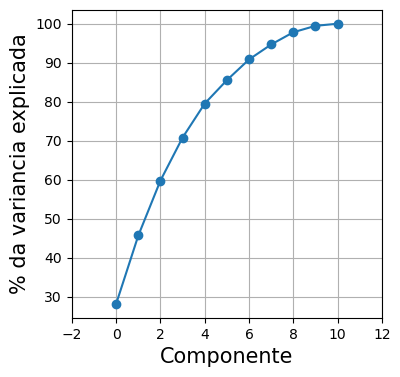

In [17]:
component_analysis(pca_cust.S, plot='varexp')

In [20]:
pca_cust4 = PCA_C(4)
pca_cust4.fit(X)

In [21]:
X_proj_cust = pca_cust4.transform(X)

In [22]:
y = df.iloc[:, -1].values

In [23]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_proj_cust, y, test_size=0.2, random_state=42)

In [26]:
# GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train_p, y_train_p)

GaussianNB()

In [27]:
y_pred = gaussian.predict(X_test_p)
print(classification_report(y_test_p, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.55      0.33      0.41       130
           6       0.44      0.81      0.57       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.47       320
   macro avg       0.17      0.19      0.16       320
weighted avg       0.41      0.47      0.40       320



C:\Users\vhst1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vhst1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vhst1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
